# Supervised learning with linear regression

##  Machine Learning(ML) Approach

In statistics, the goal is often to understand the underlying data generating process and make inferences about population parameters based on a sample of data. This often involves building models that explicitly describe the relationship between the variables in the data and estimating the parameters of these models using statistical methods. 

On the other hand, in machine learning, the focus is on building predictive models that can generalize well to new, unseen data. The goal is to find a model that minimizes the expected out-of-sample error, rather than understanding the underlying data generating process.


**Overview**
- Supervised learning approach
- Linear regression as an ML regressor
- Out-of- sample validation
- L1 and L2 regularisation

## Linear regression

*Linear regression* is a statistical technique to model relationships between *scalar respsonse* and one or more *explanatory variables*. 

It has two primary purposes:
- *Hypothesis testing*: Testing for **relationships** between explanatory variables and response, given a data sample
- *Forecasting*: Making **predictions** about the value of the response for new values of the explanatory variables

The *forecasting* can also be thought of as supervised learning:
- Predict the value of a continuous *target*
- Using one or more input *features*
- Assumes the relationships between the features and target are linear

### ML vs statistical modelling

ML and statistical modelling have lot of overlaps.

In statistical modelling we care about *how* the model works...
- For instance, we might perform significance tests on model parameters

...whilst in machine learning, we care predominantly about *how well* the model predicts unseen data
- For instance, we want the best possible model to predict house prices

*Note* this is a simplification, and in practice the differences are often much more subtle!

### ML vs statistical modelling: vocabulary

As the two fields have developed somewhat independently, there are a lot of different terms used for overlapping concepts. The following table might help identify some of the more common ones:

| Statistical modelling         | Machine learning |
| ------------------------------|------------------|
| Explanatory variable          | Input feature    |
| Dependent variable/response | Target/label     |
| Estimate a model              | Fit a model      |
| Parameters                    | Weights          |
| Forecasting                   | Prediction       |
| Logistic function             | Softmax          |

## Linear regression as a supervised learning algorithm 

We can use linear regression as a supervised learning algorithm 
- The maths does not change
- But the way we apply the model does!
  - Typically, we do not perform significance tests or interpret parameter values
  - Validate on *unseen data*
  - Apply *regularisation*

### The train-test split (out-of-sample validation)

In machine learning, we are interested in how well the model can predict *unseen data*, using *out-of-sample* validation. 

In other words, we test the model on data it has not seen during model training.

To achieve this, we us a *train-test split*, also known as *holdout-validation*. 

A train-test set split is a common practice of dividing a given dataset into two subsets: 
- A training set is used to fit a machine learning model
- A test set is used to evaluate the performance of the model on new, unseen data.

Typically, we use more data for training than testing:
- For example, 80% train, 20% test

The purpose of a train-test set split is to avoid overfitting, which occurs when a machine learning model performs well on the data it was trained on but poorly on new, unseen data. By using a separate testing set, we can get an estimate of how well the model performs on new data.

The performance of the model on the testing set is used to estimate its generalization error, which is the expected error rate on new, unseen data. If the model performs well on the testing set, we can have some confidence that it will perform well on new data.

Let's look at an example of creating a training and test set split for a linear regression model.

First, let's generate some data where true data generation function is known.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the true underlying relationship between x and y
def true_function(x):
    return 2 * x + 1

# Generate some noisy data around the true function
np.random.seed(0)
n_samples = 50
X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.3

We create a 90% traning 10% test set split with the `train_test_split` function from `sklearn`:

In [2]:
# we use a 90,10 split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Total number of observations for each split created
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((45,), (5,), (45,), (5,))

Here we can see the number of observations in the train and test set for both the target and explanatory variables.

We can examine the data and the train-test set splits we created using a scatter plot. In the plot below:

- The training set observations are represented by blue dots.
- The test set observations are represented by green dots.
- The true data generation function (which is often unknown in real-life applications) is represented by a red line.

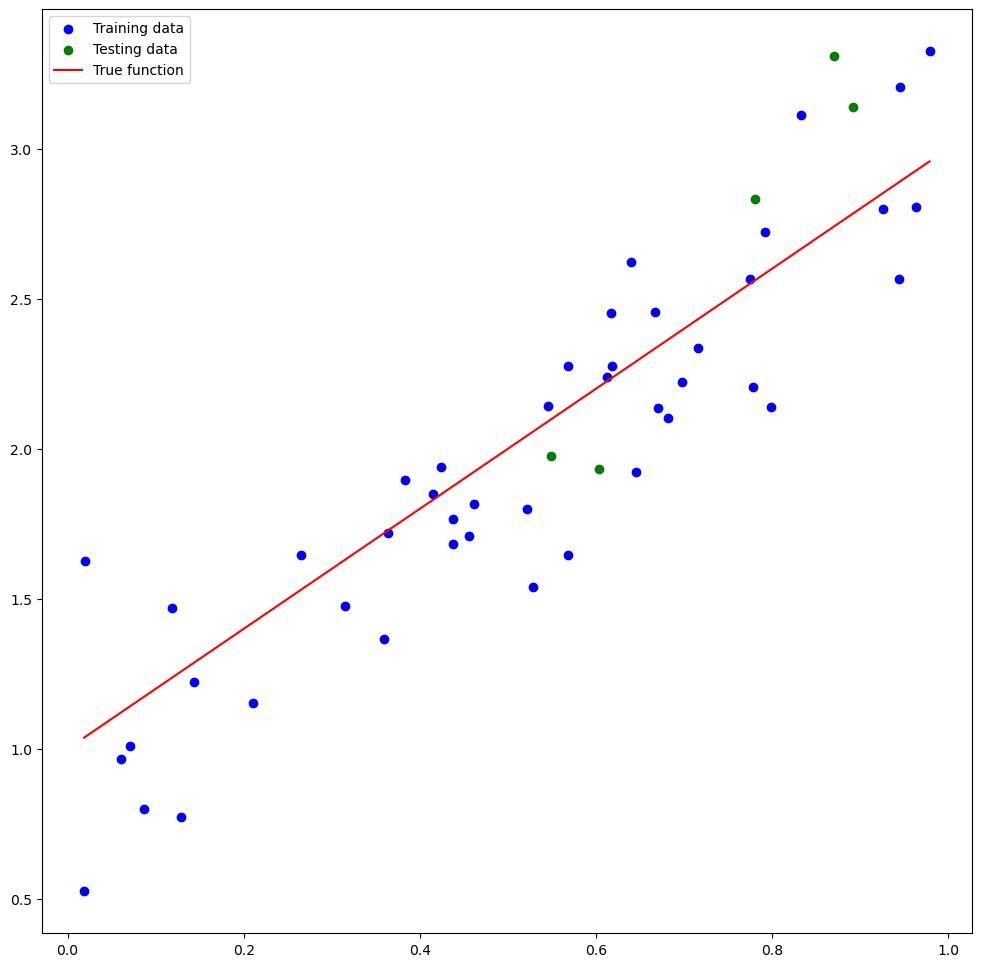

In [3]:
# Plot the true function, the training data, and the test data
plt.figure(figsize=(12, 12))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X, true_function(X), color='red', label='True function')
plt.legend()
plt.show()

In this code, we utilize the `LinearRegression` module from `sklearn` to create a linear regression model.

- By invoking the `.fit()` method, the optimal parameters for the linear model are estimated.

- It's important to keep in mind that we only train the model on the training data (`X_train` and `y_train`) and not on the test data. This ensures that the model's performance on the test data is a fair measure of its generalization ability.

In [4]:
# Import the linear regression from sklearn & create instance of the model.

# Fit a linear regression model to the training data
model = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

We can assess the performance of the linear regression model on both the training and test sets.

Calling the `.score()` method provides us with the R-squared score for the training set, which is a measure of how well the model fits the training data.

In [5]:
model.score(X_train.reshape(-1, 1), y_train)

0.8338505321739638

Let's see what the R squared score is for the test set:

In [6]:
model.score(X_test.reshape(-1, 1), y_test)

0.6182463578567636

There seems to be a noticeable discrepancy between the R-squared scores of the training and test sets.

To gain a deeper understanding, we can visualual the differences between the training and test set predictions.

In [7]:
# Get the predictions for both the train and test set
y_test_pred = model.predict(X_test.reshape(-1, 1))
y_train_pred = model.predict(X_train.reshape(-1, 1))

The graph below provides shows:

* The red line represents the actual underlying data function.
* The blue dots correspond to the training data, while the green dots represent the testing data.
* The purple and orange lines depict the model's predictions for the training and testing sets, respectively.

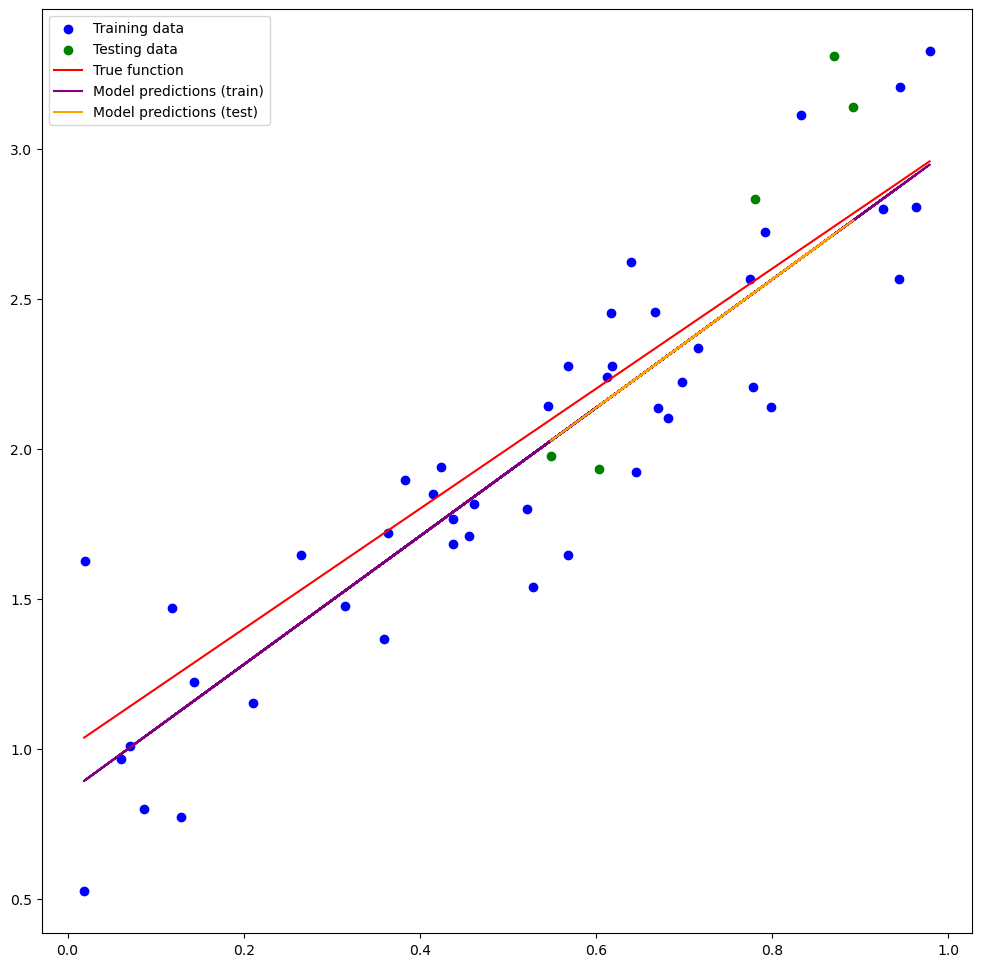

In [8]:
# Plot the true function, the training data, and the model's predictions
plt.figure(figsize=(12, 12))

plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')

plt.plot(X, true_function(X), color='red', label='True function')
plt.plot(X_train, y_train_pred, color='purple', label='Model predictions (train)')
plt.plot(X_test, y_test_pred, color='orange', label='Model predictions (test)')
plt.legend()
plt.show()

### Bias-variance tradeoff

The bias-variance tradeoff comes into play when we compare the purple and orange lines to the red line. 

The bias-variance tradeoff is a fundamental concept in machine learning that refers to the relationship between a model's complexity and its ability to generalize to new, unseen data. The tradeoff involves two types of errors: bias and variance.

* **What is the bias error** - this is the error that arises from erroneous assumptions in the ML algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (**underfitting**)

* **What is the variance error** - this the error that arises from sensitivity to small fluctuations in the training set. High variance may result from an algorithm modeling the random noise in the training data (**overfitting**)

From our example above:

- If the model is underfitting the data (i.e., has high bias), then the purple and orange lines will be close to each other and far from the actual function (i.e., the red line). 

- On the other hand, if the model is overfitting the data (i.e., has high variance), then the purple and orange lines will be very close to the training data (i.e., the blue dots) but far from the true function and test data (i.e., the green dots).


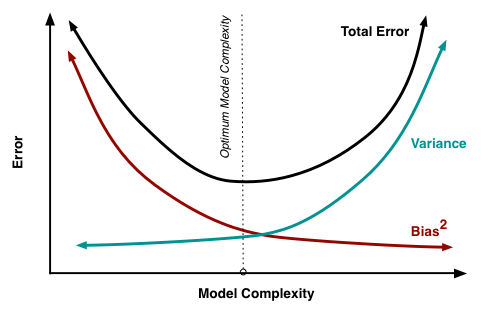

#### How to achieve a balance between bias and variance for linear regression

We can manipulate the bias-variance tradeoff by changing the complexity of the model. 


- In this example, we used a simple linear regression model with one input variable (X). 
- To reduce bias, we could try using a more complex model with more input variables or higher-order terms. 
- To reduce variance, we could try using a simpler model with fewer input variables or regularisation techniques. 

The key is to find the right balance between bias and variance that minimizes the model's overall error.

### Mean Squared Error(MSE)

In linear regression, the mean squared error (MSE) is a common metric used to evaluate how well a model performs on a set of test data that it has not seen during training. 

The MSE is calculated as the average of the squared differences between the predicted values and the actual values of the test data.

#### MSE: Definition

- Consider a linear regression model that you have trained on a set of training data with input features $X$ and output variable $y$. 

- Let's denote the predicted output of the model for a new input value $x_i$ as $\hat{y}_i$. 

- For a test set with $n$ data points, the MSE is defined as:

$$MSE = \frac{1}{n} \sum(y_i - \hat{y}_i)^2$$

where $\sum$ denotes the sum from $i=1$ to $n$.

#### Lower MSE

- A lower MSE indicates better performance of the model on the test set: The predicted values are closer to the groundtruth values.

It is important to note that the MSE is not the only metric that can be used to evaluate the performance of a linear regression model. Other metrics like root mean squared error (RMSE), mean absolute error (MAE), and coefficient of determination ($R^2$) can be used and this depends on the specific problem and requirements.

## Regularisation

**Penalized regression** is a technique we can use to reduce high variance.

### Ridge regression

Ridge regression is a regularized linear regression technique that is used to address the problem of overfitting in high-dimensional datasets. 

It is a variant of linear regression that adds a penalty term to the cost function, which limits the size of the regression coefficients.

#### Why use Ridge regression over traditional linear regression?
- In traditional linear regression, the objective is to find the values of the regression coefficients that minimize the sum of squared errors between the predicted values and the actual values. 

- However, when the number of features in the dataset is large, traditional linear regression can lead to overfitting, e.e. the model performs well on the training data but poorly on new, unseen data.

Ridge regression addresses this problem by adding a regularization term to the cost function. 

- The regularization term is a penalty term that is proportional to the sum of squares of the regression coefficients. 
- The effect of the regularization term is to shrink the values of the regression coefficients towards zero, which reduces their impact on the predictions.

The cost function for ridge regression is given by:

$$\text{Cost} = \sum_{i=1}^{n} (y_i - \hat{y}i)^2 + \lambda\sum_{j=1}^p\beta_j^2 $$

Where:

- $y_i$ is the actual value of the dependent variable for the i-th observation
- $\hat{y}_i$ is the predicted value of the dependent variable for the i-th observation
- $n$ is the number of observations
- $p$ is the number of features
- $\beta_j$ is the regression coefficient for the j-th feature
- $\lambda$ is the regularization parameter, which controls the strength of the penalty term

This is called **L2 penalty function** because the function is the square of the magnitude of coefficients in the model.

#### What is the purpose of the $\lambda$ term?

- The regularization parameter $\lambda$ is a hyperparameter that is typically chosen using cross-validation. 
- A higher value of $\lambda$ results in more regularization and smaller coefficients, which reduces the model's complexity and the risk of overfitting. 
- A lower value of $\lambda$ results in less regularization and larger coefficients, which increases the model's complexity and the risk of overfitting.


### Lasso Regression (least absolute shrinkage and selection operator)

Lasso regression is a regularized linear regression technique that is used to select a subset of features in high-dimensional datasets. 

It is similar to ridge regression. It adds a penalty term to the cost function to prevent overfitting, but the penalty term is different, and it has the additional property of inducing sparsity in the solution.

Lasso regression addresses the same problem as Ridge regression by adding a regularization term to the cost function. 

- The regularization term is a penalty term that is proportional to the absolute values of the regression coefficients. 
- The effect of the regularization term is to shrink the values of some of the regression coefficients towards zero, which reduces their impact on the predictions and **can lead to some coefficients being zero**. 
- This has the effect of inducing sparsity in the solution, meaning that only a subset of the features are selected in the final model.

The cost function for lasso regression is given by:

$$\text{Cost} = \sum_{i=1}^{n} (y_i - \hat{y}i)^2 + \lambda\sum_{j=1}^p|\beta_j|$$

Where:

- $y_i$ is the actual value of the dependent variable for the i-th observation
- $\hat{y}_i$ is the predicted value of the dependent variable for the i-th observation
- $n$ is the number of observations
- $p$ is the number of features
- $\beta_j$ is the regression coefficient for the j-th feature
- $\lambda$ is the regularization parameter, which controls the strength of the penalty term

#### When to use Lasso regression?

- Lasso regression is particularly effective when there are many features in the dataset, and only a subset of the features is expected to be important for the model's performance.
- Lasso regression can also be used for feature selection. By shrinking the coefficients of unimportant features to zero, Lasso effectively removes them from the model, resulting in a more efficient and streamlined representation of the data.

Let's look at an example of using Linear, Ridge and Lasso regression in `sklearn` on the same data set and evaluate the results.

### The Data

**Features:**

Ten numerical features are used: age, sex, body mass index, average blood pressure, and six blood serum measurements are obtained for n = 442 diabetes patients.

**Target label:**

A quantitative measure of disease progression one year after baseline.

**Note**: Each of these 10 features have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).

Source URL: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes

Let's have a look at the explanatory variables and the target variable:

In [10]:
# Get some data
diabetes = load_diabetes()

# create a pandas dataframe with the data
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# add target variable to dataframe
df['target'] = diabetes.target

# display the first 5 rows of the dataframe
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


We create a training (80%) and test (20%) set split:.

In [11]:
# Split the dataset into training(80%) and testing(20%) sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)


Fit all three models using the method `.fit()`:

In [12]:
# Create a ridge regression object with alpha=0.5
linear = LinearRegression()
ridge = Ridge(alpha=0.5)
lasso = Lasso(alpha=0.5)

# Fit the model using the training data
linear.fit(X_train,y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

Let's have a look at the coeffcients for each model:

In [13]:
print(linear.coef_)
print(ridge.coef_)
print(lasso.coef_)

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
[  45.64290971 -123.52312064  376.15147384  248.41071859  -26.89911282
  -59.71688698 -172.5492163   131.8958765   289.16015262  112.14621816]
[  0.          -0.         513.5874669  165.4975634   -0.
  -0.         -72.68339144   0.         354.65010136   0.        ]


Let's visualise the difference between the coefficients of each of the three methods: 

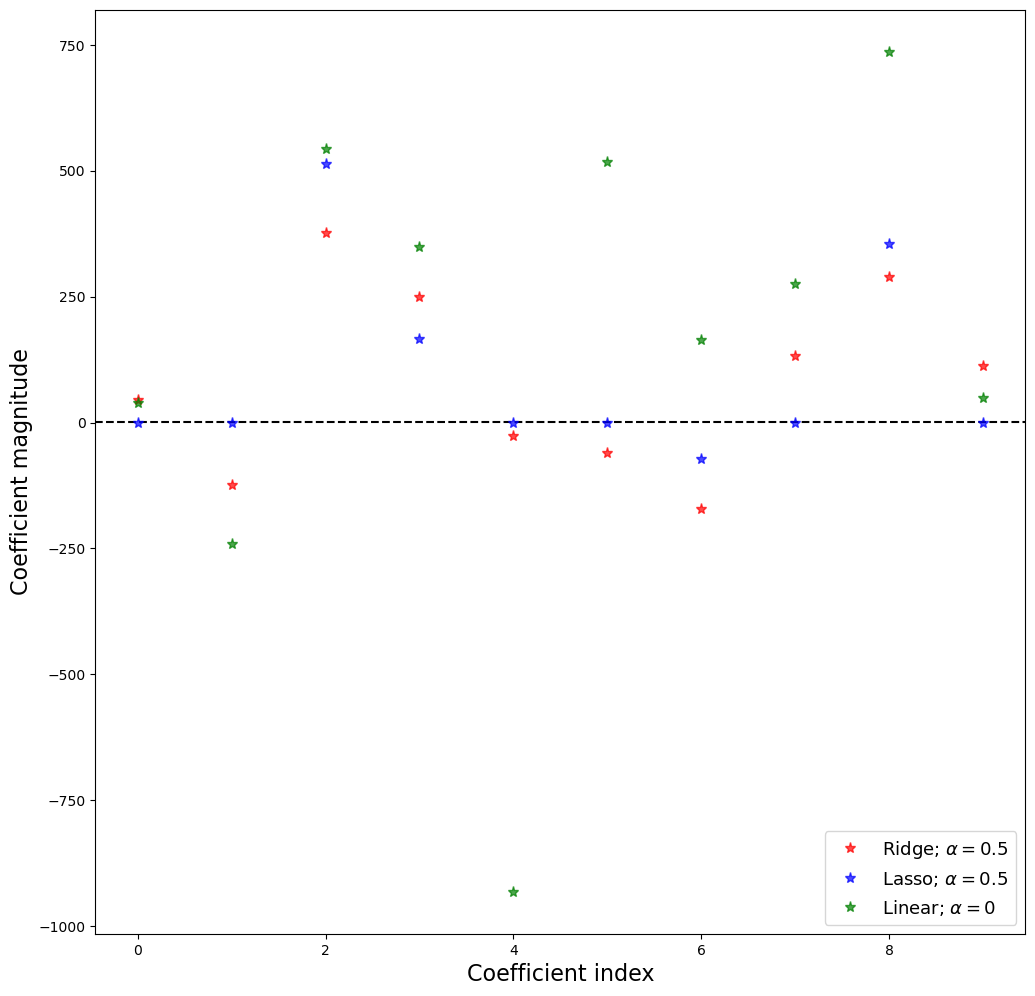

In [14]:
# Plot the coefficients
plt.figure(figsize=(12, 12))
plt.plot(ridge.coef_, alpha=0.7, linestyle='none', marker='*', markersize=8, color='red', label=r'Ridge; $\alpha = 0.5$', zorder=7)
plt.plot(lasso.coef_, alpha=0.7, linestyle='none', marker='*', markersize=8, color='blue', label=r'Lasso; $\alpha = 0.5$', zorder=7)
plt.plot(linear.coef_, alpha=0.7, linestyle='none', marker='*', markersize=8, color='green', label=r'Linear; $\alpha = 0$', zorder=7)
plt.axhline(y=0.5, color='k', linestyle='--')
plt.xlabel('Coefficient index', fontsize=16)
plt.ylabel('Coefficient magnitude', fontsize=16)
plt.legend(fontsize=13, loc=4)
plt.show()

Ridge regression shrinks coefficients to be close to zero but Lasso regression shrinks the coefficients all the way to zero.

Let's calculate the Mean Squared Error for each method:

In [15]:
from sklearn.metrics import mean_squared_error

# Predict the target values for the test data
y_pred_lin = linear.predict(X_test)
y_pred_r = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Calculate the mean squared error of the predictions
mse_lin = mean_squared_error(y_test, y_pred_lin)
print("Mean squared error for Linear regression: ", mse_lin)
mse_r = mean_squared_error(y_test, y_pred_r )
print("Mean squared error for Ridge regression: ", mse_r)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean squared error for Lasso regression: ", mse_lasso)


Mean squared error for Linear regression:  2900.1936284934804
Mean squared error for Ridge regression:  2917.176593478922
Mean squared error for Lasso regression:  2945.1488790424924
